# Problem statment
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission File Format The file should contain a header and have the following format:

Id,SalePrice
1461,169000.1
1462,187724.1233

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from os import chdir
chdir("F:/Etlhive/Housing_Salesprice_Project-main/")

Read Data Set

In [3]:
import pandas as pd
train = pd.read_csv("training_set.csv")
test = pd.read_csv("testing_set.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Missing Data treatment

In [9]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

In [11]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

In [12]:
#train.isna().sum()

In [13]:
cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        con.append(i)
        x = round(train[i].mean(),2)
        train[i] = train[i].fillna(x)

In [14]:
for i in test.columns:
    if(test[i].dtypes == "object"):
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        x = round(test[i].mean(),2)
        test[i] = test[i].fillna(x)

In [15]:
#test.isna().sum()

Intial X and Y

In [16]:
Y = train[['SalePrice']]
X = train.drop(labels=["Id","SalePrice"],axis=1)

Remove Outliers

In [17]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [18]:
#Q = X[con].skew().sort_values()
#cols_with_skew = Q[Q > 2].index

In [19]:
#X[cols_with_skew].skew()

In [20]:
#import numpy as np 
#for j in cols_with_skew: 
#    w = [] 
#    for i in X[j]: 
#        if(i == 0): 
#            w.append(0) 
#            else: 
#            w.append(round(np.log(i),3)) 
#    X[j]=w

In [21]:
#X[cols_with_skew].skew()

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [23]:
outliers = []
for i in X1.columns:
    outliers.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))

In [24]:
import numpy as np
outliers = np.unique(outliers)

In [25]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [26]:
X.shape

(1021, 79)

In [27]:
X.index = range(0,1021,1)
Y.index = range(0,1021,1)

EDA

In [28]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    model = ols(rel,train).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

SalePrice ~ MSZoning --->   0.0
SalePrice ~ Street --->   0.117
SalePrice ~ Alley --->   0.0
SalePrice ~ LotShape --->   0.0
SalePrice ~ LandContour --->   0.0
SalePrice ~ Utilities --->   0.5847
SalePrice ~ LotConfig --->   0.0
SalePrice ~ LandSlope --->   0.1414
SalePrice ~ Neighborhood --->   0.0
SalePrice ~ Condition1 --->   0.0
SalePrice ~ Condition2 --->   0.0434
SalePrice ~ BldgType --->   0.0
SalePrice ~ HouseStyle --->   0.0
SalePrice ~ RoofStyle --->   0.0
SalePrice ~ RoofMatl --->   0.0
SalePrice ~ Exterior1st --->   0.0
SalePrice ~ Exterior2nd --->   0.0
SalePrice ~ MasVnrType --->   0.0
SalePrice ~ ExterQual --->   0.0
SalePrice ~ ExterCond --->   0.0
SalePrice ~ Foundation --->   0.0
SalePrice ~ BsmtQual --->   0.0
SalePrice ~ BsmtCond --->   0.0
SalePrice ~ BsmtExposure --->   0.0
SalePrice ~ BsmtFinType1 --->   0.0
SalePrice ~ BsmtFinType2 --->   0.0
SalePrice ~ Heating --->   0.0008
SalePrice ~ HeatingQC --->   0.0
SalePrice ~ CentralAir --->   0.0
SalePrice ~ Electric

In [29]:
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")


In [30]:
train.corr()["SalePrice"].sort_values().index[0:13]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],
      dtype='object')

In [31]:
u = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea']

for i in u:
    con.remove(i)

Preprocessing

In [32]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

In [33]:
Xnew = X1.join(X2)

In [34]:
Xnew.shape

(1021, 255)

In [35]:
Y.shape

(1021, 1)

Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

Backward elemination model

In [37]:
from statsmodels.api import add_constant,OLS

xconst = add_constant(xtrain,has_constant="add")

In [38]:
ols = OLS(ytrain,xconst)
model = ols.fit()


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.02
Date:                Tue, 25 Oct 2022   Prob (F-statistic):          6.08e-292
Time:                        13:19:15   Log-Likelihood:                -9054.5
No. Observations:                 816   AIC:                         1.851e+04
Df Residuals:                     616   BIC:                         1.945e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.333e+04   2178.289      6.117      0.000    9047.773    1.76e+04
LotFrontage               -266.4252   1146.443     -0.232      0.816   -2517.836    1984.985
LotArea                   5142.1532   1239.017      4.150      0.000    2708.943    7575.363
OverallQual               8225.7713   1600.579      5.139      0.000    5082.519    1.14e+04
YearBuilt                 6684.8536   2824.732      2.367      0.018    1137.581    1.22e+04
YearRemodAdd              5781.0512   1373.400      4.209      0.000    3083.937    8478.166
MasVnrArea                -861.1007   1280.919     -0.672      0.502   -3376.599    1654.398
BsmtFinSF1                -464.0506   8501.900     -0.055      0.956   -1.72e+04    1.62e+04
BsmtUnfSF                -7112.4224   8957.034     -0.794      0.427   -2.47e+04    1.05e+04
TotalBsmtSF               1.422e+04   7908.072      1.799      0.073   -1306.003    2.98e+04
1stFlrSF                  7202.6049   4.76e+04      0.151      0.880   -8.63e+04    1.01e+05
2ndFlrSF                  1.771e+04   5.82e+04      0.304      0.761   -9.67e+04    1.32e+05
GrLivArea                 9592.0505   6.22e+04      0.154      0.878   -1.13e+05    1.32e+05
BsmtFullBath              -278.2839   1143.314     -0.243      0.808   -2523.550    1966.982
FullBath                  -583.2277   1492.683     -0.391      0.696   -3514.591    2348.136
HalfBath                   251.2976   1257.040      0.200      0.842   -2217.306    2719.901
BedroomAbvGr             -1100.1187   1255.045     -0.877      0.381   -3564.805    1364.568
TotRmsAbvGrd               426.2803   1655.399      0.258      0.797   -2824.630    3677.191
Fireplaces                -418.4419   2049.280     -0.204      0.838   -4442.865    3605.981
GarageYrBlt              -2394.4310   1933.742     -1.238      0.216   -6191.958    1403.096
GarageCars                2667.5878   1911.611      1.395      0.163   -1086.476    6421.652
GarageArea                4431.6809   1858.717      2.384      0.017     781.490    8081.872
WoodDeckSF                3440.2774    813.520      4.229      0.000    1842.669    5037.886
OpenPorchSF               2182.2623    862.036      2.532      0.012     489.376    3875.149
ScreenPorch               1094.1589    723.836      1.512      0.131    -327.326    2515.644
MSZoning_C (all)         -2.305e+04   1.02e+04     -2.251      0.025   -4.32e+04   -2940.859
MSZoning_FV               2.347e+04   6684.528      3.511      0.000    1.03e+04    3.66e+04
MSZoning_RH              -1383.8473   8738.917     -0.158      0.874   -1.85e+04    1.58e+04
MSZoning_RL               6009.6151   4114.647      1.461      0.145   -2070.821    1.41e+04
MSZoning_RM               8278.5218   4796.827      1.726      0.085   -1141.596    1.77e+04
Alley_Grvl    

In [40]:
model.rsquared_adj

0.925694687920248

In [41]:
col_drop = model.pvalues.sort_values().index[-1]

In [42]:
col_drop

'GarageQual_Po'

In [43]:
Xnew = Xnew.drop(labels=col_drop,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain,has_constant="add")

In [44]:
ols = OLS(ytrain,xconst)
model = ols.fit()
print(model.rsquared_adj)

0.925694687920248


In [45]:
col_drop = model.pvalues.sort_values().index[-1]

In [46]:
col_drop

'Neighborhood_SawyerW'

In [47]:
Xnew = Xnew.drop(labels=col_drop,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
print(model.rsquared_adj)
col_drop = model.pvalues.sort_values().index[-1]
print(col_drop)

0.925694687920248
Foundation_PConc


In [48]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9257
Exterior1st_WdShing
0.9257
Condition2_RRNn
0.9257
BsmtFinType2_Unf
0.9257
BsmtFinType1_BLQ
0.9257
SaleType_Oth
0.9257
Foundation_Slab
0.9258
BsmtFinSF1
0.9259
BldgType_Twnhs


In [49]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9259
Condition1_RRNe
0.9259
Exterior2nd_Plywood
0.9259
Foundation_Wood
0.9259
Exterior2nd_Wd Shng
0.9261
Exterior1st_MetalSd
0.9262
GarageCond_TA
0.9262
Condition2_Norm
0.9262
Functional_Maj2


In [50]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9262
Functional_Min1
0.9263
Heating_GasW
0.9263
Heating_Floor
0.9263
BsmtFinType1_Rec
0.9264
Electrical_FuseP
0.9264
SaleType_WD
0.9265
LotConfig_FR2
0.9265
1stFlrSF


In [51]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9266
HouseStyle_1.5Fin
0.9266
MSZoning_RH
0.9266
RoofStyle_Gable
0.9266
KitchenQual_TA
0.9266
Exterior2nd_Brk Cmn
0.9268
Neighborhood_BrkSide
0.9269
Neighborhood_Blueste
0.927
BsmtFullBath


In [52]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9271
PavedDrive_P
0.9271
HouseStyle_SLvl
0.9272
RoofMatl_WdShake
0.9272
RoofStyle_Flat
0.9272
RoofMatl_Tar&Grv
0.9273
HeatingQC_Fa
0.9273
HeatingQC_Gd
0.9274
LotFrontage


In [53]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9275
HalfBath
0.9276
Foundation_CBlock
0.9278
MasVnrType_BrkCmn
0.9278
Fireplaces
0.9279
MasVnrType_None
0.928
SaleCondition_Family
0.928
TotRmsAbvGrd
0.9281
KitchenQual_Fa


In [54]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9282
Condition2_Feedr
0.9283
Heating_Grav
0.9284
Exterior2nd_ImStucc
0.9285
RoofStyle_Mansard
0.9286
GarageCond_Gd
0.9287
FireplaceQu_No Fireplace
0.9287
RoofMatl_WdShngl
0.9288
BsmtCond_Fa


In [55]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9288
RoofStyle_Gambrel
0.9289
BldgType_Duplex
0.929
GarageType_BuiltIn
0.929
GarageType_Detchd
0.9291
GarageType_Basment
0.9292
BsmtExposure_Av
0.9292
Heating_GasA
0.9292
SaleType_ConLw


In [56]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9293
BsmtFinType2_ALQ
0.9294
BsmtFinType1_LwQ
0.9295
BldgType_TwnhsE
0.9296
Exterior1st_CBlock
0.9296
Exterior2nd_CBlock
0.9297
HouseStyle_SFoyer
0.9298
FullBath
0.9299
SaleType_ConLI


In [57]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9299
Exterior2nd_BrkFace
0.93
Condition1_RRAn
0.93
Condition1_Feedr
0.9301
Fence_MnWw
0.9301
Alley_Pave
0.9301
Alley_No alley access
0.9302
Alley_Grvl
0.9303
GarageCond_Ex


In [58]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9303
GarageQual_TA
0.9303
GarageQual_Ex
0.9304
Neighborhood_Veenker
0.9305
Exterior2nd_AsbShng
0.9305
Exterior2nd_Stone
0.9306
ExterQual_Gd
0.9306
ExterQual_TA
0.9307
SaleType_Con


In [59]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9308
Condition1_RRNn
0.9308
LotConfig_FR3
0.9309
SaleCondition_Abnorml
0.931
BsmtFinType2_Rec
0.931
Exterior1st_Stucco
0.9311
MSZoning_RL
0.9312
MSZoning_RM
0.9312
Neighborhood_IDOTRR


In [60]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9313
SaleType_ConLD
0.9314
BldgType_2fmCon
0.9314
BsmtFinType2_LwQ
0.9315
BsmtFinType1_Unf
0.9315
GarageCond_Po
0.9316
PavedDrive_Y
0.9317
PavedDrive_N
0.9317
LandContour_Low


In [61]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9317
Exterior1st_CemntBd
0.9318
Fence_GdPrv
0.9318
Fence_GdWo
0.9319
Fence_MnPrv
0.9319
Fence_No Fence
0.932
Exterior1st_ImStucc
0.9321
Condition1_PosA
0.9321
Exterior2nd_HdBoard


In [62]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9322
LotShape_IR3
0.9322
BedroomAbvGr
0.9322
Condition1_Artery
0.9322
SaleType_COD
0.9322
Exterior2nd_Other
0.9323
HeatingQC_TA
0.9323
MasVnrArea
0.9323
MasVnrType_BrkFace


In [63]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9323
BsmtFinType2_BLQ
0.9324
GarageCond_Fa
0.9324
Neighborhood_Somerst
0.9323
SaleType_New
0.9323
Exterior1st_AsbShng
0.9323
BsmtCond_Gd
0.9323
BsmtQual_No Basement
0.9323
BsmtCond_No Basement


In [64]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9323
BsmtFinType2_No Basement
0.9323
BsmtFinType1_No Basement
0.9323
BsmtExposure_No Basement
0.9323
BsmtQual_Fa
0.9324
FireplaceQu_TA
0.9324
FireplaceQu_Ex
0.9324
Neighborhood_Gilbert
0.9324
Neighborhood_Sawyer


In [65]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9325
LotShape_IR2
0.9325
LotShape_Reg
0.9325
LotShape_IR1
0.9326
GarageType_Attchd
0.9326
Foundation_Stone
0.9326
Neighborhood_CollgCr
0.9325
Neighborhood_Timber
0.9326
Heating_Wall


In [66]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9325
Exterior1st_BrkComm
0.9325
Exterior2nd_CmentBd
0.9325
Exterior2nd_MetalSd
0.9326
BsmtExposure_Mn
0.9326
ExterQual_Fa
0.9326
FireplaceQu_Gd
0.9326
BsmtCond_TA
0.9325
RoofStyle_Hip


In [67]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9325
Neighborhood_MeadowV
0.9324
BsmtFinType2_GLQ
0.9323
Functional_Min2
0.9323
Functional_Maj1
0.9322
KitchenQual_Gd
0.9322
ExterCond_Fa
0.9322
Neighborhood_SWISU
0.9321
LandContour_Bnk


Check for overfitting

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

In [69]:
tr_err

275462530.41

In [70]:
ts_err

8.174732492804471e+27

Regularize

In [71]:
tr = []
ts = []

Ridge Regression

In [72]:
w = []
y = 0.0
for i in range(0,1000):
    y = round(y + 0.01,2)
    w.append(y)

In [73]:
from sklearn.linear_model import Ridge

In [74]:
for i in w:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain) 
    ts_pred = model.predict(xtest)
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr.append(tr_err)
    ts.append(ts_err)

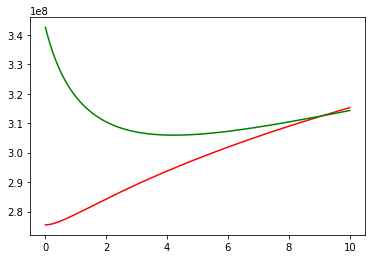

In [75]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [77]:
rr = Ridge(alpha=9.5)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err,ts_err)

313770563.0 313303686.8


Lasso Regression

In [78]:
w = []
y = 70.0
for i in range(0,1000):
    y = round(y + 0.01,2)
    w.append(y)    

In [79]:
from sklearn.linear_model import Lasso
tr = []
ts = []
for i in w:
    rr = Lasso(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain) 
    ts_pred = model.predict(xtest)
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr.append(tr_err)
    ts.append(ts_err)

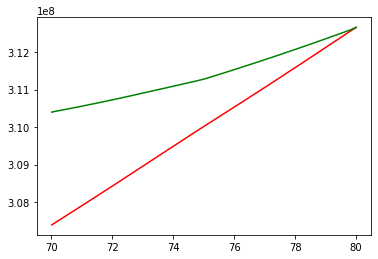

In [80]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [81]:
rr = Lasso(alpha=80)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err,ts_err)

312655769.98 312664783.76


Making test set ready for prediction

In [82]:
con

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch']

In [83]:
cat

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [84]:
cols_to_keep = xtrain.columns

In [85]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [86]:
test1 = test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch']]

In [87]:
Xtest1 = pd.DataFrame(ss.transform(test1),columns=test1.columns)

In [88]:
Xtest2 = pd.get_dummies(test[cat])

In [89]:
Xtest_new = Xtest1.join(Xtest2)

In [90]:
final_xtest = Xtest_new[cols_to_keep]

In [91]:
pred = model.predict(final_xtest)

In [92]:
T = test[["Id"]]
T['SalePrice']=pred

In [93]:
T.head(3)

,Id,SalePrice
0,1461,125339.086822
1,1462,174173.178474
2,1463,192960.532165


In [94]:
T.to_csv("submissions.csv")